## SMPSO

### Example

In [1]:
from jmetal.algorithm.multiobjective.smpso import SMPSO
from jmetal.operator import PolynomialMutation
from jmetal.problem import ZDT4
from jmetal.util.archive import CrowdingDistanceArchive
from jmetal.util.termination_criterion import StoppingByEvaluations

problem = ZDT4()

max_evaluations = 25000
algorithm = SMPSO(
    problem=problem,
    swarm_size=100,
    mutation=PolynomialMutation(probability=1.0 / problem.number_of_variables, distribution_index=20),
    leaders=CrowdingDistanceArchive(100),
    termination_criterion=StoppingByEvaluations(max=max_evaluations)
)

algorithm.run()
solutions = algorithm.get_result()

We can now visualize the Pareto front approximation:

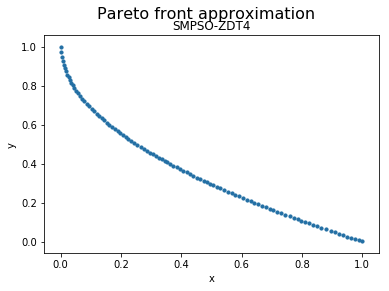

In [3]:
from jmetal.lab.visualization.plotting import Plot
from jmetal.util.solution import get_non_dominated_solutions

front = get_non_dominated_solutions(solutions)

plot_front = Plot(plot_title='Pareto front approximation', axis_labels=['x', 'y'])
plot_front.plot(front, label='SMPSO-ZDT4')

### API